In [2]:
#Nahallah Champagne
#Project 1
#CS301 Introduction to Data Science

In [3]:
import os
print(os.path.getsize('winequality-red.csv'))
#print(os.path.getsize('Airline Dataset.csv'))


100951


In [4]:
#--------------------------Data Collection and Preprocessing--------------------------------------#
import pandas as pd   
import numpy as np 

#Load dataset into DataFrame
wine_df = pd.read_csv('winequality-red.csv')
#airport_df = pd.read_csv('Airline Dataset.csv')

#Number of rows in the dataset
num_rows = len(wine_df)
print(f"The dataset has {num_rows} rows.")

#Display the first 5 rows
wine_df.head()

The dataset has 1599 rows.


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


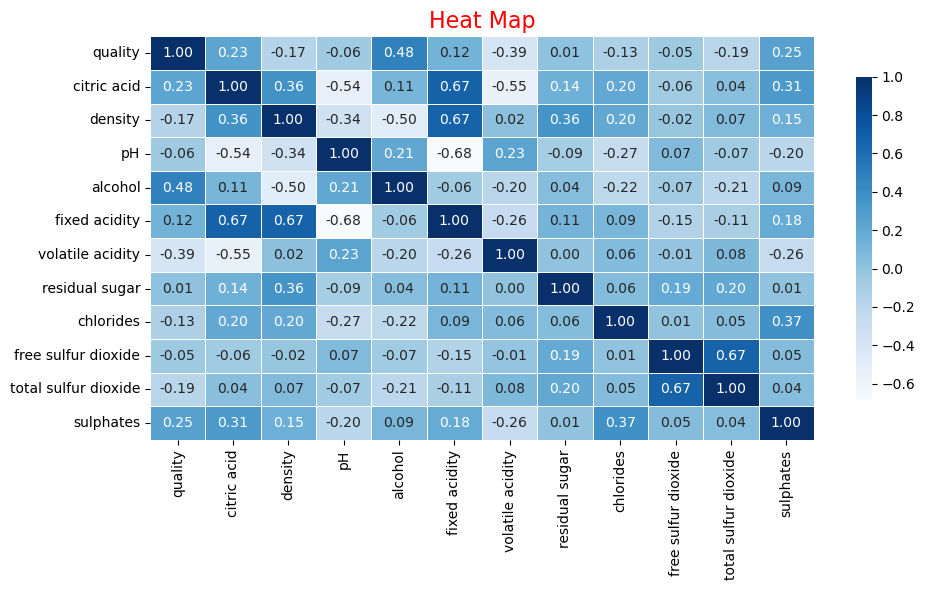

In [8]:
#----------------------------------Data Visualization--------
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Heat Map of the relationship between most of the columns in the dataset
correlation_matrix = wine_df[['quality', 'citric acid', 'density', 'pH', 'alcohol', 'fixed acidity', 'volatile acidity',
                             'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Heat Map', fontsize=16, color="red")
plt.tight_layout()
plt.show()

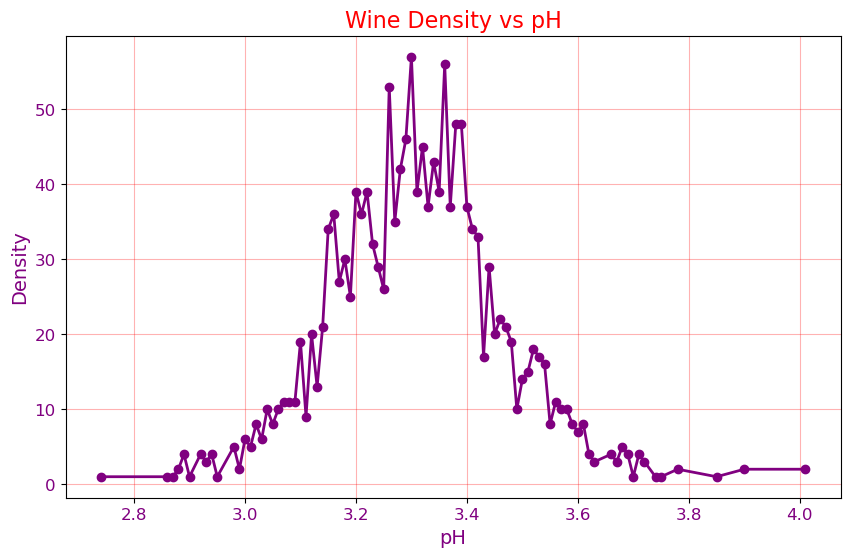

In [10]:
import matplotlib.pyplot as plt

# Data Visualization: Line Graph of the relationship between wine density and pH
quality_counts = wine_df['pH'].value_counts().sort_index()  # Ensure the index is sorted for a proper line plot

plt.figure(figsize=(10, 6))
plt.plot(quality_counts.index, quality_counts.values, color='purple', marker='o', linestyle='-', linewidth=2)
plt.title('Wine Density vs pH', fontsize=16, color='red') 
plt.xlabel('pH', fontsize=14, color='purple')
plt.ylabel('Density', fontsize=14, color='purple')
plt.xticks(fontsize=12, color='purple')
plt.yticks(fontsize=12, color='purple')
plt.grid(alpha=0.3, color='red')
plt.show()

In [176]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#---------------Data Preparation------------------------------
# Select only the relevant columns, and copy the information from the dataset into a new one
#Copy() to ensure that it doesnt modify the original dataset
df = wine_df[['quality', 'alcohol', 'sulphates', 'density', 'pH', 'total sulfur dioxide']].copy()

#Initialize a dictionary to store the encoders for each attribute
attribute_encoders = {}

# Loop through each column except the target column 'Change_Plan' to fit and transform the data
# and print out how each attribute is encoded
# Initialize encoders and encode data
attribute_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    attribute_encoders[column] = le #each encoded col is added to the dict

# Check encodings
#for column, encoder in attribute_encoders.items():
    #print(f"{column} mapping: {dict(zip(encoder.classes_, range(len(encoder.classes_))))}")

#--------Splitting the Features and Target---------------------
# Prepare features and target
X = df[['alcohol', 'sulphates', 'density', 'pH', 'total sulfur dioxide']]  # Features: 'sulphates', 'density', 'pH', 'total sulfur dioxide'
y = df['quality']  #Target column: Quality

# Check target distribution
print("Target class distribution:\n", X.value_counts())

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Train Decision Tree
#min_samples_split=5: Requires at least 5 samples to split a node.
#clf = DecisionTreeClassifier(min_samples_split=10, min_samples_leaf=5, max_depth=5, random_state=42)
clf = DecisionTreeClassifier(max_depth=3, min_samples_split=5, random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)

#Evaluae the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display predictions
print("Predicted labels:", y_pred[:5])
print("Actual labels:", y_test.values[:5])

Target class distribution:
 alcohol  sulphates  density  pH  total sulfur dioxide
28       22         113      51  28                      4
33       47         154      52  38                      4
22       16         163      41  14                      4
26       16         156      48  25                      4
12       7          94       48  20                      3
                                                        ..
17       16         354      45  52                      1
                    237      43  54                      1
         13         354      40  71                      1
                    332      26  34                      1
64       46         332      10  65                      1
Name: count, Length: 1356, dtype: int64
Accuracy: 0.55
Predicted labels: [2 2 3 2 3]
Actual labels: [3 2 3 2 3]
